In [1]:
import pandas as pd
#import icu
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix, hstack
import re
#Classifier
import spacy
from sklearn import linear_model
from sklearn.kernel_approximation import AdditiveChi2Sampler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, naive_bayes, svm
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
#Preprocessing
from sklearn import preprocessing
from sklearn.feature_selection import f_classif
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectFpr, chi2
from scipy.stats import rankdata
from scipy.stats.mstats import describe
from sklearn.preprocessing import Normalizer
from scipy.stats.mstats import gmean
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif,f_regression
from sklearn.feature_selection import SelectPercentile, chi2,SelectFpr
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import random
import nltk
from sklearn.preprocessing import add_dummy_feature
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentAnalyzer
from nltk.tokenize import word_tokenize 
from sklearn.kernel_approximation import Nystroem
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords as sw
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.preprocessing import MaxAbsScaler 
from nltk.tokenize import word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer 
from wordcloud import WordCloud
from nltk.corpus import stopwords as sw
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction import stop_words
from sklearn.naive_bayes import ComplementNB
from sklearn import linear_model
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV
from num2words import num2words 
import multidict
import string
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering,MiniBatchKMeans,SpectralClustering, MeanShift

c:\users\marco\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [711]:
dev = pd.read_csv('development.csv')
ev = pd.read_csv('evaluation.csv')

In [75]:
ita_stemmer = nltk.stem.snowball.ItalianStemmer()
class LemmaTokenizer(object):
    def __init__(self): 
        self.lemmatizer = WordNetLemmatizer()
        
    def __call__(self, documents): 
        lemmas = [] 
        #print(nltk.pos_tag( word_tokenize(documents) ))
        for t in word_tokenize(documents):
            t = t.strip()
            lemma = self.lemmatizer.lemmatize(t) 
            lemmas.append(ita_stemmer.stem(lemma)) 
            #lemmas.append(lemma) 
        return lemmas

## Stop words

In [6]:
stop_words=list(string.punctuation) + nltk.corpus.stopwords.words('italian')

In [79]:
#d1=["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the",'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','seen']
d4 = list(stop_words.ENGLISH_STOP_WORDS)
voc = ["1", "2","3","4","5","6","7","8","9","q","w","e","r","t","y","u","i","o","p","a","s","d","f","g","h","j","k","l","z","x","c","v","b","n","m"]
#d5 = ["a","â","à","z","y","x","w","v","u","t","s","r","q","p","o","n","m","l","k","j","i","h","g","f","e","d","c","b","ô","qu","pu","sa","se","où","o|","ou","on","oh","ni","si","ne","na","me","ma","là","le","ta","la","je","te","il","hé","ho","hi","ha","as","fi","eu","et","es","en","eh","du","tu","té","un","va","de","da","au","ci","vu","vé","ai","ah","ça","ès","ce","ohé","hem","car","hop","hou","fût","pur","fut","hue","hui","tel","bon","que","fus","zut","hum","ici","aux","ils","tac","aie","qui","été","ces","cet","ait","sur","eût","las","les","tes","tic","eux","eut","toc","lui","eus","euh","pif","bat","eue","etc","lès","vos","est","toi","mes","ton","pff","moi","son","mon","mot","soi","peu","dès","six","non","bas","nos","bah","pas","dos","ses","dix","nul","hep","dit","par","pan","olé","des","vif","via","ont","vas","paf","une","uns","ore","ouf","oust","aura","étés","vais","allo","onze","unes","deux","vers","aies","dire","ayez","vifs","vive","dite","dits","ollé","sera","delà","deja","très","trop","nous","tres","doit","sept","donc","dont","sent","dans","sein","seul","neuf","sien","crac","allô","sauf","même","peut","sois","vlan","sans","tout","soit","voie","elle","tous","peux","pfft","sont","mine","sous","mien","clic","clac","meme","mais","vont","avez","pfut","vous","etre","avec","cinq","eues","pire","stop","chut","sait","chez","suis","lors","suit","plus","cher","tien","rien","beau","leur","pour","rend","rare","ceux","étée","fais","tend","quoi","fait","bien","tant","pres","afin","flac","floc","fois","font","cent","celà","quel","boum","tels","huit","près","êtes","puis","houp","cela","ceci","hors","gens","pure","holà","haut","hein","être","brrr","état","étiez","avais","après","quand","avait","fûtes","fûmes","telle","aucun","bravo","fusse","celle","était","étais","hélas","apres","force","avant","psitt","celui","façon","abord","jusqu","bigre","juste","quels","cette","vôtre","assez","eûtes","eûmes","autre","rares","tenir","sujet","étant","tente","leurs","pouah","tiens","reste","eusse","ainsi","chers","aussi","etant","alors","plouf","maint","plein","essai","pièce","chère","soyez","votre","aviez","memes","merci","voilà","entre","comme","enfin","miens","mille","mince","voici","vives","elles","avoir","couic","pense","moins","egale","effet","toute","basee","passé","début","mêmes","seize","étées","selon","parmi","sinon","parle","siens","serai","avons","parce","aurez","auras","seule","dring","vivat","vingt","douze","aurai","notre","trois","outre","ouste","ouias","tsoin","serez","nôtre","devra","aient","seras","ayons","ayant","quant","aurais","tsouin","unique","aurait","allons","aucune","nôtres","seriez","devers","serons","seront","ouvert","serait","serais","trente","devant","valeur","dessus","treize","nommés","droite","sienne","auriez","depuis","parler","aucuns","parole","dehors","dedans","semble","duquel","durant","debout","toutes","soient","egales","permet","auquel","sommes","contre","avions","encore","voient","mienne","envers","aurons","chères","malgré","malgre","soyons","auront","chiche","eurent","aupres","plutôt","suffit","chaque","retour","eusses","tienne","chacun","rendre","suivre","lequel","tenant","faites","certes","quinze","vôtres","tandis","jusque","quelle","autres","autrui","proche","celles","feront","étions","hurrah","quatre","furent","fusses","quanta","telles","hormis","divers","devrait","fussent","importe","tardive","puisque","aujourd","uniques","comment","combien","faisant","aurions","laisser","quelles","dessous","quelque","surtout","extenso","excepté","compris","premier","directe","quoique","suivant","pouvait","tiennes","lorsque","eussiez","eussent","avaient","chacune","ceux-là","restant","diverse","restent","ceux-ci","environ","revoici","revoilà","souvent","miennes","sixième","naturel","plupart","peuvent","dernier","siennes","certain","pendant","attendu","étaient","nouveau","dixième","doivent","serions","partant","parseme","onzième","parlent","parfois","ouverte","ouverts","fussiez","septième","douzième","nouveaux","semblent","dix-sept","celui-ci","celle-là","nombreux","celui-là","toujours","neuvième","touchant","personne","derniere","sapristi","certaine","dix-neuf","dix-huit","toi-même","soi-même","multiple","lesquels","moindres","soixante","moi-même","moi-meme","minimale","diverses","celle-ci","maximale","possible","certains","beaucoup","pourquoi","lui-même","pourrais","subtiles","auxquels","relative","lui-meme","pourrait","rarement","derriere","suivante","eussions","suivants","derrière","première","desquels","laquelle","quelques","ailleurs","probable","probante","deuxième","auraient","quatorze","quarante","huitième","fussions","allaient","seraient","tellement","anterieur","faisaient","exterieur","superpose","cinquième","naturelle","eux-mêmes","suivantes","longtemps","cinquante","suffisant","certaines","multiples","neanmoins","cependant","seulement","elle-même","egalement","notamment","toutefois","désormais","néanmoins","celles-là","celles-ci","semblable","troisième","personnes","sacrebleu","plusieurs","possessif","possibles","prealable","autrement","quiconque","desormais","autrefois","différent","quelqu'un","procedant","quatrième","moyennant","different","auxquelles","semblaient","differents","quelconque","différente","desquelles","nous-mêmes","différents","absolument","nombreuses","restrictif","concernant","exactement","necessaire","comparable","naturelles","anterieure","lesquelles","possessifs","suffisante","maintenant","vous-mêmes","specifique","speculatif","specifiques","strictement","remarquable","anterieures","comparables","elles-mêmes","precisement","directement","différentes","particulier","aujourd'hui","differentes","quant-à-soi","particulière","quatre-vingt","cinquantaine","relativement","cinquantième","uniformement","premièrement","deuxièmement","quatrièmement","troisièmement","necessairement","particulièrement"]
#d3 =  list(string.punctuation) + ['``',"'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would','le', 'u', "'m", '0', 'affect', 'ai', 'change', 'greeting', 'pa', 'regard', 'result', 'word','c', 'ca', 'v', 'bit', 'two','easy', 'enough', 'btw','small','new','u','mail','improve','item','via','recently','mailing','subject','like','still','g','undestand', 'yet','somewhere','two','got','making','r','2.','2','soon','think','perhaps','open','small','well','try','sorry','lot','get','thanks','hold','note','try','discovered','heard','read','going','received','say','useful','person','thus','seems','way','several','good','seen','set','take','new','used','started', 'know',"'just",'read','gradually','somewhere','select','enough','house','clarification','manage','case','understand','someone','read']
#d4 = ["'d", "'ll", "'re", "'s", "'ve", 'doe', 'ha', 'le', "n't", 'sha', 'u', 'wa', 'wo']
#stop = list(set(sw.words('english') + d1 + d2+d3+d4))
d6 = ['adess', 'allor', 'ancor', 'are', 'aver', 'aves', 'buon', 'cinqu', 'compr', 'consecut', 'cos', 'dentr', 'dev', 'dopp', 'fo', 'gent', 'indietr', 'invec', 'lavor', 'megl', 'molt', 'nom', 'not', 'nov', 'nuov', 'pen', 'person', 'ple', 'poc', 'prim', 'promess', 'quart', 'quas', 'quattr', 'quind', 'quint', 'second', 'senz', 'sett', 'sol', 'sopr', 'soprattutt', 'sott', 'stat', 'sub', 'tant', 'te', 'temp', 'terz', 'tho', 'tripl', 'ultim', 'volt', 'who']
d5 = ['abbi', 'abbiam', 'abov', 'aggiunt', 'alon', 'althoug', 'andar', 'anyon', 'anywher', 'appars', 'appen', 'appes', 'arriv', 'avemm', 'avend', 'avess', 'avesser', 'avessim', 'avest', 'avet', 'avev', 'avevam', 'avra', 'avrann', 'avre', 'avrebb', 'avrebber', 'avrem', 'avremm', 'avrest', 'avret', 'avut', 'bagagl', 'becam', 'becaus', 'becom', 'befor', 'besid', 'bimb', "c'er", 'capit', 'com', 'compagn', 'consider', 'contr', 'davver', 'decis', 'describ', 'don', 'ebber', 'elsewh', 'enoug', 'eran', 'erav', 'eravam', 'essend', 'everyon', 'everywh', 'fac', 'facc', 'facess', 'facessim', 'facest', 'fann', 'far', 'fara', 'farann', 'fare', 'farebb', 'farebber', 'farem', 'farest', 'fec', 'fecer', 'fidanz', 'fin', 'fir', 'fiv', 'form', 'foss', 'fosser', 'fossim', 'fost', 'fumm', 'fur', 'giv', 'hann', 'hav', 'henc', 'iniz', "l'abb", 'lor', 'lung', 'mad', 'meanwhil', 'min', 'mor', 'mov', 'nam', 'neanc', 'nin', 'nonc', 'noon', 'nostr', 'nowh', 'otherwis', 'otten', 'parol', 'pens', 'perc', 'pleas', 'poch', 'pres', 'prezz', 'prov', 'punt', 'qual', 'qualsias', 'quant', 'quantum', 'quell', 'quest', 'ragazz', 'recension', 'sam', 'sar', 'sara', 'sarann', 'sare', 'sarebb', 'sarebber', 'sarem', 'sarest', 'scors', 'sembr', 'sent', 'siam', 'sian', 'siat', 'sid', 'siet', 'sinc', 'sinistr', 'som', 'someon', 'sometim', 'somewh', 'son', 'stand', 'stann', 'star', 'stara', 'starann', 'starebb', 'starebber', 'starem', 'starest', 'stav', 'stavam', 'stemm', 'stess', 'stesser', 'stessim', 'stest', 'stett', 'stetter', 'sti', 'stiam', 'stil', 'tak', 'thenc', 'ther', 'therefor', 'thes', 'thos', 'thoug', 'thre', 'throug', 'tratt', 'trov', 'tutt', 'twelv', 'u', 'val', 'verit', 'vol', 'vostr', 'wa', 'wer', 'whenc', 'wher', 'whic', 'whil', 'whol', 'whos']
d8 = list(string.punctuation) +["a","abbastanza","abbia","abbiamo","abbiano","abbiate","accidenti","ad","adesso","affinche","agl","agli","ahime","ahimã¨","ahimè","ai","al","alcuna","alcuni","alcuno","all","alla","alle","allo","allora","altre","altri","altrimenti","altro","altrove","altrui","anche","ancora","anni","anno","ansa","anticipo","assai","attraverso","avanti","avemmo","avendo","avente","aver","avere","averlo","avesse","avessero","avessi","avessimo","aveste","avesti","avete","aveva","avevamo","avevano","avevate","avevi","avevo","avrai","avranno","avrebbe","avrebbero","avrei","avremmo","avremo","avreste","avresti","avrete","avrà","avrò","avuta","avute","avuti","avuto","berlusconi","c","caso","cento","certa","certe","certi","che","chi","chicchessia","chiunque","ci","ciascuna","ciascuno","cima","cinque","cio","cioe","cioã¨","cioè","circa","ciã²","ciò","co","codesta","codesti","codesto","cogli","coi","col","colei","coll","coloro","colui","come","comprare","comunque","con","concernente","conciliarsi","conclusione","consecutivi","consecutivo","cos","cosa","cosi","cosã¬","così","cui","d","da","dagl","dagli","dai","dal","dall","dalla","dalle","dallo","dappertutto","davanti","degl","degli","dei","del","dell","della","delle","dello","dentro","detto","deve","devo","di","dice","dietro","dire","dirimpetto","diventa","diventare","diventato","dopo","doppio","dov","dove","dovra","dovrà","dovrã","dovunque","due","dunque","durante","e","ebbe","ebbero","ebbi","ecc","ecco","ed","effettivamente","egli","ella","entrambi","eppure","era","erano","eravamo","eravate","eri","ero","esempio","esse","essendo","esser","essere","essi","ex","fa","faccia","facciamo","facciano","facciate","faccio","facemmo","facendo","facesse","facessero","facessi","facessimo","faceste","facesti","faceva","facevamo","facevano","facevate","facevi","facevo","fai","fanno","farai","faranno","fare","farebbe","farebbero","farei","faremmo","faremo","fareste","faresti","farete","farà","farò","fatto","favore","fece","fecero","feci","fin","finche","fine","fino","forse","fosse","fossero","fossi","fossimo","foste","fosti","fra","frattempo","fu","fui","fummo","furono","generale","gia","giacche","giorni","giorno","giu","già","giã","gli","gliela","gliele","glieli","glielo","gliene","governo","grande","gruppo","ha","haha","hai","hanno","ho","i","ie","ieri","il","improvviso","in","inc","indietro","infatti","inoltre","insieme","intanto","intorno","invece","io","l","la","lasciato","lato","lavoro","le","lei","li","lo","loro","lui","là","lã","ma","macche","magari","me","medesimo","mediante","mentre","mesi","mezzo","mi","mia","mie","miei","ministro","mio","modo","momento","mondo","mosto","nazionale","ne","negl","negli","nei","nel","nell","nella","nelle","nello","nemmeno","neppure","nessun","nessuna","nessuno","niente","no","noi","nome","non","nondimeno","nonostante","nonsia","nostra","nostre","nostri","nostro","novanta","nove","nuovi","o","od","oggi","ogni","ognuna","ognuno","oltre","oppure","ora","ore","osi","ossia","ottanta","per","perche","perchã¨","perchè","perché","percio","perciã²","perciò","perfino","pero","persino","persone","perã²","però","piglia","piu","piuttosto","piã¹","più","po","poi","poiche","possa","possedere","posteriore","press","prima","primo","principalmente","probabilmente","promesso","proprio","puo","pure","purtroppo","puã²","può","qua","qualche","qualcosa","qualcuna","qualcuno","quale","quali","qualunque","quando","quanta","quante","quanti","quanto","quantunque","quarto","quasi","quattro","quel","quella","quelle","quelli","quello","quest","questa","queste","questi","questo","qui","quindi","quinto","realmente","recente","recentemente","registrazione","relativo","riecco","rispetto","salvo","sara","sarai","saranno","sarebbe","sarebbero","sarei","saremmo","saremo","sareste","saresti","sarete","sarà","sarã","sarò","scola","scopo","scorso","se","secondo","seguente","seguito","sei","sembra","sembrare","sembrato","sembrava","sembri","si","sia","siamo","siano","siate","siete","sig","sono","srl","sta","stai","stando","stanno","starai","staranno","stiano","stiate","sto","su","sua","subito","successivamente","successivo","sue","sugl","sugli","sui","sul","sull","sulla","sulle","sullo","suo","suoi","tale","tali","talvolta","tanto","te","tempo","th","ti","titolo","tra","tu","tua","tue","tuo","tuoi","tutta","tuttavia","un","una","uno","uomo","va","vai","vale","vari","varia","varie","vario","verso","vi","visto","voi","volta","volte","vostra","vostre","vostri","vostro","ã¨","è"]
d1 = list(string.punctuation) + nltk.corpus.stopwords.words('italian')
d2 = ['120', 'hotel', 'andare', 'recensioni', 'trattati','appeso','ottenere','sinistra', 'terminal', 'prezzo','aree','stile','staff','bagagli','iniziare','acca','fidanzato',':','stare','os','pochi','pur','scorsa','capitato','verità','trovati','bimba','qualsiasi','penso','lunga', '``','sentito','aggiunta','valeva','appena',"c'era",'lì','essa','?','pò','punti','“','”','...','’','entra','apparso','vie','ragazza','forma',"'",'sembravano','preso','compagno','é',"l'abbiamo",'..','provato','neanche',"finita'","''",'davvero','s','nota','volete','deciso','parola','nonché',';','etc..','considerando', 'didnt','arriva']
d3 = ["a ", "so",'avec',"adesso","ai","al","alla","allo","allora","altre","altri","altro","anche","ancora","avere","aveva","avevano","ben","buono","che","chi","cinque","comprare","con","consecutivi","consecutivo","cosa","cui","da","del","della","dello","dentro","deve","devo","di","doppio","due","e","ecco","fare","fine","fino","fra","gente","giu","ha","hai","hanno","ho ","il","indietro","invece","io","la","lavoro","le","lei","lo","loro","lui","lungo","ma","me","meglio","molta","molti","molto","nei","nella","no","noi","nome","nostro","nove","nuovi","nuovo","o","oltre","ora","otto","pero","persone","piu","poco","primo","promesso","qua","quarto","quasi","quattro","quello","questo","qui","quindi","quinto","sara","secondo","sei","sembra","sembrava","senza","sette","sia","siamo","siete","solo","sono","sopra ","soprattutto ","sotto","stati","stato ","stesso ","su ","subito","sul","sulla","tanto","te ","tempo","terzo","tra","tre","triplo","ultimo","un","una","uno","va","vai","voi","volte","vostro"]
stop = list(set( d1 + d2+d3 + d5+d6))
print(len(stop))


712


In [8]:
stop1 =  list(string.punctuation) + ['a', 'abbastanza', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'accidenti', 'ad', 'adesso', 'affinche', 'agl', 'agli', 'ahime', 'ahimã¨', 'ahimè', 'ai', 'al', 'alcuna', 'alcuni', 'alcuno', 'all', 'alla', 'alle', 'allo', 'allora', 'altre', 'altri', 'altrimenti', 'altro', 'altrove', 'altrui', 'anche', 'ancora', 'anni', 'anno', 'ansa', 'anticipo', 'assai', 'attesa', 'attraverso', 'avanti', 'avemmo', 'avendo', 'avente', 'aver', 'avere', 'averlo', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avuto', 'basta', 'ben', 'berlusconi', 'c', 'casa', 'caso', 'cento', 'certa', 'certe', 'certi', 'certo', 'che', 'chi', 'chicchessia', 'chiunque', 'ci', 'ciascuna', 'ciascuno', 'cima', 'cinque', 'cio', 'cioe', 'cioã¨', 'cioè', 'circa', 'ciã²', 'ciò', 'co', 'codesta', 'codesti', 'codesto', 'cogli', 'coi', 'col', 'colei', 'coll', 'coloro', 'colui', 'come', 'cominci', 'comprare', 'comunque', 'con', 'concernente', 'conciliarsi', 'conclusione', 'consecutivi', 'consecutivo', 'contro', 'cos', 'cosa', 'cosi', 'cosã¬', 'così', 'cui', 'd', 'da', 'dagl', 'dagli', 'dai', 'dal', 'dall', 'dalla', 'dalle', 'dallo', 'dappertutto', 'davanti', 'degl', 'degli', 'dei', 'del', 'dell', 'della', 'delle', 'dello', 'dentro', 'detto', 'deve', 'devo', 'di', 'dice', 'dietro', 'dire', 'dirimpetto', 'diventa', 'diventare', 'diventato', 'dopo', 'doppio', 'dov', 'dove', 'dovra', 'dovrà', 'dovrã', 'dovunque', 'due', 'dunque', 'durante', 'e', 'ebbe', 'ebbero', 'ebbi', 'ecc', 'ecco', 'ed', 'effettivamente', 'egli', 'ella', 'entrambi', 'eppure', 'era', 'erano', 'eravamo', 'eravate', 'eri', 'ero', 'esempio', 'esse', 'essendo', 'esser', 'essere', 'essi', 'ex', 'fa', 'faccia', 'facciamo', 'facciano', 'facciate', 'faccio', 'facemmo', 'facendo', 'facesse', 'facessero', 'facessi', 'facessimo', 'faceste', 'facesti', 'faceva', 'facevamo', 'facevano', 'facevate', 'facevi', 'facevo', 'fai', 'fanno', 'farai', 'faranno', 'fare', 'farebbe', 'farebbero', 'farei', 'faremmo', 'faremo', 'fareste', 'faresti', 'farete', 'farà', 'farò', 'fatto', 'favore', 'fece', 'fecero', 'feci', 'fin', 'finalmente', 'finche', 'fine', 'fino', 'forse', 'forza', 'fosse', 'fossero', 'fossi', 'fossimo', 'foste', 'fosti', 'fra', 'frattempo', 'fu', 'fui', 'fummo', 'fuori', 'furono', 'futuro', 'generale', 'gente', 'gia', 'giacche', 'giorni', 'giorno', 'giu', 'già', 'giã', 'gli', 'gliela', 'gliele', 'glieli', 'glielo', 'gliene', 'governo', 'grande', 'gruppo', 'ha', 'haha', 'hai', 'hanno', 'ho', 'i', 'ie', 'ieri', 'il', 'improvviso', 'in', 'inc', 'indietro', 'infatti', 'inoltre', 'insieme', 'intanto', 'intorno', 'invece', 'io', 'l', 'la', 'lasciato', 'lato', 'lavoro', 'le', 'lei', 'li', 'lo', 'lontano', 'loro', 'lui', 'lungo', 'luogo', 'là', 'lã', 'ma', 'macche', 'magari', 'maggior', 'mai', 'male', 'malgrado', 'malissimo', 'mancanza', 'marche', 'me', 'medesimo', 'mediante', 'meglio', 'meno', 'mentre', 'mesi', 'mezzo', 'mi', 'mia', 'mie', 'miei', 'mila', 'miliardi', 'milioni', 'minimi', 'ministro', 'mio', 'modo', 'momento', 'mondo', 'mosto', 'nazionale', 'ne', 'negl', 'negli', 'nei', 'nel', 'nell', 'nella', 'nelle', 'nello', 'no', 'noi', 'nome', 'non', 'nondimeno', 'nonostante', 'nonsia', 'nostra', 'nostre', 'nostri', 'nostro', 'novanta', 'nove', 'nulla', 'nuovi', 'nuovo', 'o', 'od', 'oggi', 'ogni', 'ognuna', 'ognuno', 'oltre', 'oppure', 'ora', 'ore', 'osi', 'ossia', 'ottanta', 'otto', 'paese', 'parecchi', 'parecchie', 'parecchio', 'parte', 'partendo', 'peccato', 'peggio', 'per', 'perche', 'perchã¨', 'perchè', 'perché', 'percio', 'perciã²', 'perciò', 'perfino', 'pero', 'persino', 'persone', 'perã²', 'però', 'piedi', 'pieno', 'piglia', 'piu', 'piuttosto', 'piã¹', 'più', 'po', 'poco', 'poi', 'poiche', 'possa', 'possedere', 'posteriore', 'posto', 'potrebbe', 'preferibilmente', 'presa', 'press', 'prima', 'primo', 'principalmente', 'probabilmente', 'promesso', 'proprio', 'puo', 'pure','purtroppo', 'puã²', 'può', 'qua', 'qualche', 'qualcosa', 'qualcuna', 'qualcuno', 'quale', 'quali', 'qualunque', 'quando', 'quanta', 'quante', 'quanti', 'quanto', 'quantunque', 'quarto', 'quasi', 'quattro', 'quel', 'quella', 'quelle', 'quelli', 'quello', 'quest', 'questa', 'queste', 'questi', 'questo', 'qui', 'quindi', 'quinto', 'realmente', 'recente', 'recentemente', 'registrazione', 'relativo', 'riecco', 'rispetto', 'salvo', 'sara', 'sarai', 'saranno', 'sarebbe', 'sarebbero', 'sarei', 'saremmo', 'saremo', 'sareste', 'saresti', 'sarete', 'sarà', 'sarã', 'sarò', 'scola', 'scopo', 'scorso', 'se', 'secondo', 'seguente', 'seguito', 'sei', 'sembra', 'sembrare', 'sembrato', 'sembrava', 'sembri', 'sempre', 'senza', 'sette', 'si', 'sia', 'siamo', 'siano', 'siate', 'siete', 'sig', 'solito', 'solo', 'soltanto', 'sono', 'sopra', 'soprattutto', 'sotto', 'spesso', 'srl', 'sta', 'stai', 'stando', 'stanno', 'starai', 'staranno', 'starebbe', 'starebbero', 'starei', 'staremmo', 'staremo', 'stareste', 'staresti', 'starete', 'starà', 'starò', 'stata', 'state', 'stati', 'stato', 'stava', 'stavamo', 'stavano', 'stavate', 'stavi', 'stavo', 'stemmo', 'stessa', 'stesse', 'stessero', 'stessi', 'stessimo', 'stesso', 'steste', 'stesti', 'stette', 'stettero', 'stetti', 'stia', 'stiamo', 'stiano', 'stiate', 'sto', 'su', 'sua', 'subito', 'successivamente', 'successivo', 'sue', 'sugl', 'sugli', 'sui', 'sul', 'sull', 'sulla', 'sulle', 'sullo', 'suo', 'suoi', 'tale', 'tali', 'talvolta', 'tanto', 'te', 'tempo', 'terzo', 'th', 'ti', 'titolo', 'torino', 'tra', 'tranne', 'tre', 'trenta', 'triplo', 'troppo', 'trovato', 'tu', 'tua', 'tue', 'tuo', 'tuoi', 'tutta', 'tuttavia', 'tutte', 'tutti', 'tutto', 'uguali', 'ulteriore', 'ultimo', 'un', 'una', 'uno', 'uomo', 'va', 'vai', 'vale', 'vari', 'varia', 'varie', 'vario', 'verso', 'vi', 'via', 'vicino', 'visto', 'vita', 'voi', 'volta', 'volte', 'vostra', 'vostre', 'vostri', 'vostro', 'ã¨', 'è', 'ahimã', 'cioã', 'cosã', 'perchã', 'assolutamente', 'veramente', 'dovuto', 'punto', 'presso', 'andare', 'chiedere', 'situata', 'trovare', 'prendere', 'appena', 'prenotato', 'arrivati', 'sicuramente', 'altra', 'potuto', 'dì', 'lì', 'pò', 'davvero', 'credo', 'almeno', 'chiesto', 'so', 'scelto', 'dovrebbe', 'bisogno', 'trova', 'dato', 'ok', 'rn', 'posso', 'viene', 'accanto', 'preso', 'andati']

In [ ]:
lemmaTokenizer = LemmaTokenizer() 
vectorizer = TfidfVectorizer(tokenizer=lemmaTokenizer, max_df = 0.5, min_df = 3, analyzer ='word',ngram_range = (1,4))
#vectorizer =  CountVectorizer(tokenizer=lemmaTokenizer, max_df = 0.5, min_df = 3, analyzer ='word',ngram_range = (1,4))
vectorizer.fit(dev['text'].values.tolist())
vectors = vectorizer.transform(dev['text'].values.tolist())

tf = TfidfTransformer()
vectors1 = tf.fit_transform(vectors)
vectors=vectors1

In [763]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(dev['class'].values)

## Adding feature

In [1080]:
dev1 = list()
dev2 = list()
for doc in dev['text'].values:
    dev2.append(np.array(re.sub('['+string.punctuation+']', ' ', doc.lower()).split()))
    dev1.append(re.sub('['+string.punctuation+']', ' ', doc.lower()))
dev1 = np.array(dev1)
dev2 = np.array(dev2)

In [1081]:
bad_words = ['capelli', 'assurdo', 'ingannevole', 'inesistenti', 'scarseggianti', 'sgarbato', 'indisponente', 'presuntuosamente', 'rivoltare', 'preservativo', 'anti-igienica',  'frettoloso', 'scadenti','losco', 'saccenti', '1/5','1/10' ,'sconsiglierei', 'inadeguato', 'imbevibile', 'orribile', 'labirintico', 'freddissime','peggior','abbandonata','luriodo', 'affolato', 'sgradevole','vergogna', 'sporco', 'squallido',  'caserma', 'lurida', 'maleducato', 'insopportabile', 'scontroso', 'sigaretta','peggior','sangue','schifo','sporca','degradante','briciole','squallida','odiare']
good_words = ['rara', 'calorosa', 'insonorizzazione', 'superlativa', 'sorridente', 'vivamente', 'centralissimo'  'vicinissimo', 'economicissime',  'puntualissimi', 'confortevoli', 'competente',  'elegante', 'deliziosa','gentilissimo','affezionati', 'superlativo','sapientemente','eleganza','compiacere', 'straodinaria', 'lode', 'comode','benissimo','incantevole','lussuoso', 'comodissimo','brillanti','brillante','eccelente','raffinatissimo','incredbili','squisiti','perfetta','meraviglie', 'meraviglia','impeccabile','consigliatissimo','splendido']

#bad_words = ['piccolo', 'squallido', 'caro', 'sporco' 'piccola', 'vergogna', 'digiuno', 'scadente ', 'terribile', 'abbandonata','caserma', 'gridando', 'vecchiume', 'sbattendo', 'lurida', 'macchiate','strappate' 'sottodimensionato','sconsigliato','maleducato ', 'poco pulite', 'inferiore', 'non merita', 'problemi','migliorare','difficile', ' mediocre','polvere','plastica','gradini','negative','affollato','stretta', 'limitata','insopportabile','sporca','briciole','deludente','freddo','sgradevole','piccolissima','fastidiosa','difficoltà','finta','carissimo','tassa','maleodoranti', 'povero','brutto','capelli', 'labirinto','impersonale', 'non torneremo','non inclusa','poco pulita','non funzionava','non pulito','non','modesto','scontroso','difetto', 'non tornerò', 'puzzava','fumo','sigaretta','assurdo','poco confortevole', 'vecchio','rotti','rotta','cattivo','peggior','sangue','ospedale','puzza','schifo','scorbutico','decenza']
#good_words = ['lussuoso', 'cordiale', 'perfetta', 'pulitissime', 'incantevole', 'stupendo', 'spaziosa', 'fantastico', 'comodo', 'tranquillissima' ,'rinnovato' ,'efficiente', 'eccezionale', 'ottimo', 'speciale', 'sapientemente', 'grande','ben','buono','eccellente','bel','affezionati', 'superiore', 'belle','buone','splendida','elegantemente','buona','ideale','gentile','disponibile','rara','pulite','confortevoli', 'elegante','ottima','ritornerò', 'ottimo','cortese','superlativo','bella','ampia','pulita','comodissima','accogliente','comoda','carino','gentilissimo','neo','ritorneremo', 'splendide','buon','pulito','complimenti','eleganza','eccellenti','incredibile','stupenda','meraviglioso','suite','efficienti','grazie','incredibili','disponibili','bellissima','nessun difetto', 'deliziosi','squisiti','tornerò','bello','confortevole','perfetta','meraviglie','impeccabile','fantastica']

bad_words = np.array(list(set(bad_words)))
good_words = np.array(list(set(good_words)))

print(len(bad_words), len(good_words))
features = np.zeros((len(dev),2))

for good in good_words:
    for i, doc in enumerate(dev2):
        if good in doc:
            features[i][0]+=1

print('qui')
for bad in bad_words:
    for i, doc in enumerate(dev2):
        if bad in  doc:
            features[i][1]+=1

44 38
qui


nlp = spacy.load("it_core_news_sm")

for i, val in enumerate(dev['text']):
    doc = nlp(val)
    print(i)
    for token in doc:
        if token.pos_ == 'ADJ':
            features[i][2]+=1

In [ ]:
X = vectors
X = csr_matrix(X)
X  = hstack([X, features])
#X = hstack([X, appo.reshape(X.shape[0], 1)])
X = csr_matrix(X)

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
ros = RandomOverSampler(random_state=0)
from imblearn.over_sampling import BorderlineSMOTE
X, y = BorderlineSMOTE().fit_resample(X, y)

#smote_nc = SMOTENC(categorical_features = [0,1], random_state=0)
#X, y = smote_nc.fit_resample(X, y)
#X, y = ros.fit_resample(X, y)

In [1110]:
pos = 0
neg = 0
count1 = 0
count2 = 0
for i, val in enumerate(features):
    if val[0] > val[1]:
        count1+=1
        if y[i] == 1:
            pos+=1
    if val[1] > val[0]:
        count2+=1
        if y[i] == 0:
            neg+=1
print(f"POS {pos/count1}")
print(f"NEG {neg/count2}")
print(count1+count2)

POS 0.918601867368925
NEG 0.9379912663755459
10644


In [ ]:
#from sklearn.preprocessing import KBinsDiscretizer#
#chi2sampler = AdditiveChi2Sampler(sample_steps=2)
#X = chi2sampler.fit_transform(X, y)
s = SelectKBest(chi2, k=150000)
#est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
#X = est.fit_transform(X)
#X = preprocessing.StandardScaler(with_mean = False).fit_transform(X)
#s = SelectFpr(chi2, alpha=0.2)
#s = SelectPercentile(chi2, percentile=40)
#embeded_rf_selector = SelectFromModel(LinearSVC(dual=False, class_weight='balanced'))
#embeded_rf_selector.fit(X, y)
#embeded_rf_selector.get_support()

X = s.fit_transform(X, y)

#scaler = MaxAbsScaler()
#X = scaler.fit_transform(X)
#model =  LinearSVC()
#rfe = RFE(model, 100)
#X = rfe.fit_transform(X, y)
#X = winsorize(X, limits = 0.01)
#lsvc = LinearSVC().fit(X, y)
#clf = LassoCV()
#model = SelectFromModel(lsvc, prefit=False)
#X = model.fit_transform(X, y)


svd = TruncatedSVD(n_components=150, algorithm = 'arpack', tol = 1e-15)
X_projection = svd.fit_transform(vectors)
plt.plot(svd.explained_variance_ratio_, marker='o', linestyle='') 

svd = TruncatedSVD(n_components=80, algorithm = 'arpack', tol = 1e-15)
#pca = SparsePCA(n_components=15)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X = svd.fit_transform(X)

## Classification

In [1200]:
X.shape

(28754, 481887)

In [493]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = RandomForestClassifier(n_estimators = 100, random_state=2, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
print(f1_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9473057457576659
[[1885  474]
 [  57 4773]]


In [492]:
kne = KNeighborsClassifier(n_jobs = -1, n_neighbors=7)
kne.fit(X_train, y_train)
y_pred = kne.predict(X_test)
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8057734023026865
[[  32 2327]
 [   1 4829]]


X = PolynomialFeatures(2).fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lsvc = LinearSVC(C = 3.5, random_state = 3, dual = False,  max_iter=20000, intercept_scaling = 0.0001, class_weight='balanced')
#svc = LinearSVC(C =33 random_state = 3,   dual=False,  intercept_scaling = 0.001, class_weight='balanced')

lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)

#scores = cross_val_score(lsvc, X, y, cv=5, scoring='f1_weighted', n_jobs = -1)
#print(scores)
#print(scores.mean())
print(f1_score(y_test, y_pred, average = "weighted"))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



In [495]:
lg = LogisticRegression(C =3, warm_start = True,random_state = 3,  multi_class = 'ovr',n_jobs = 8, max_iter = 1000, tol = 1e-9,  class_weight='balanced', dual=False, intercept_scaling = 0.001)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

#scores = cross_val_score(lg, X, y, cv=5, scoring='f1_macro', n_jobs = -1)
#print(scores)
#print(scores.mean())
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9741039983426559
[[2237  122]
 [ 128 4702]]


In [1087]:
clf = PassiveAggressiveClassifier(max_iter=100, random_state=1, tol=1e-3, C = 2, n_jobs = -1, fit_intercept = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.980830343413634
[[2218  141]
 [  46 4784]]


In [670]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = linear_model.SGDClassifier(max_iter=1000,  warm_start = True, tol=1e-15, n_iter_no_change = 4,   n_jobs=-1,  random_state = 1, verbose = True, class_weight = 'balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

-- Epoch 1
Norm: 59.21, NNZs: 138004, Bias: 0.170988, T: 21565, Avg. loss: 0.265743
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 55.33, NNZs: 146519, Bias: 0.168211, T: 43130, Avg. loss: 0.153917
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 54.69, NNZs: 149245, Bias: 0.177868, T: 64695, Avg. loss: 0.144174
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 54.31, NNZs: 150311, Bias: 0.216224, T: 86260, Avg. loss: 0.138242
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 54.16, NNZs: 150971, Bias: 0.193145, T: 107825, Avg. loss: 0.134548
Total training time: 0.07 seconds.
-- Epoch 6
Norm: 54.06, NNZs: 151443, Bias: 0.191371, T: 129390, Avg. loss: 0.132885
Total training time: 0.09 seconds.
-- Epoch 7
Norm: 54.00, NNZs: 151689, Bias: 0.191979, T: 150955, Avg. loss: 0.130809
Total training time: 0.10 seconds.
-- Epoch 8
Norm: 53.96, NNZs: 151879, Bias: 0.188514, T: 172520, Avg. loss: 0.129940
Total training time: 0.12 seconds.
-- Epoch 9
Norm: 53.90, NNZs: 152029, Bias: 

In [ ]:
gbc = GradientBoostingClassifier(n_estimators = 1000,  max_depth = 15, max_features = 'log2', min_samples_leaf = 0.001, random_state = 1)
y_pred1 = gbc.fit(X_train, y_train).predict(X_test)
print(f1_score<(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

## DBscan

In [367]:
from sklearn.neighbors import NearestNeighbors

# Given matrix X and min_npoints, plot K-Neighbors chart
# It also plots a horizontal line in correspondence to eps value
def plot_neighbors(X, min_points, eps=0):
    nbrs = NearestNeighbors(n_neighbors=min_points + 1).fit(X)
    distances, indices = nbrs.kneighbors(X)

    k_dist = distances[:, -1]
    k_dist.sort()
    x_axis = np.arange(k_dist.shape[0])

    ### Disable comment below to activate interactive plots
    #%matplotlib notebook

    fig, ax = plt.subplots()
    ax.plot(x_axis, k_dist, linestyle='', marker='o', markersize=1)
    
    # Plot a horizontal line in correspondence to eps value
    ax.hlines(eps, x_axis.min(), x_axis.max(), linestyle='--')
    ax.set_title(f"K-Neighbors chart. Min_points = {min_points}, eps={eps}.")
    plt.show()

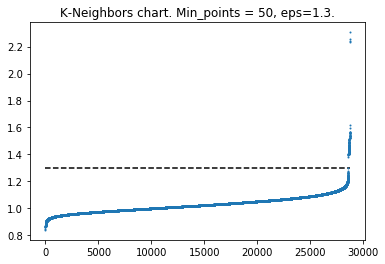

In [368]:
plot_neighbors(X, 50, eps=1.3)

In [1008]:
model_db10 = DBSCAN(eps = 1.3, min_samples=50)
res_db10 = model_db10.fit_predict(X)

In [21]:
print(np.unique(res_db10,return_counts = True))
X.shape

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57], dtype=int64), array([ 1645,  2683,   866, 12854,   352,   237,   363,    84,   300,
         216,   309,   564,   142,    75,   234,   168,    91,   568,
         273,   208,    82,   198,   398,   781,   661,   143,    71,
         173,   294,   431,    98,    79,   148,   121,   164,    61,
          56,   384,   108,   240,    69,   176,   119,   154,   526,
         102,   162,    69,   388,   142,    55,    82,    92,   105,
         102,    54,    59,    60,    53], dtype=int64))


(29492, 194671)

In [395]:
X  = hstack([X, res_db10.reshape(X.shape[0], 1)])
X = csr_matrix(X)

X = X[ res_db10 != -1 ]
y = y[ res_db10 != -1 ]

## Solution

In [1250]:
vectors_ev = vectorizer.transform(ev['text'].values.tolist())
ev1 = list()
ev2 = list()
for doc in ev['text'].values:
    ev2.append(np.array(re.sub('['+string.punctuation+']', ' ', doc.lower()).split()))
    ev1.append(re.sub('['+string.punctuation+']', ' ', doc.lower()))
ev1 = np.array(ev1)
#vectors_ev = lsa.transform(vectors_ev)

X_ev = tf.transform(vectors_ev)

In [1252]:
features_ev = np.zeros((len(ev),2))
for good in good_words:
    for i, doc in enumerate(ev2):
        if good in doc:
            features_ev[i][0]+=1
print('qui')        

for bad in bad_words:
    for i, doc in enumerate(ev2):
        if bad in doc:
            features_ev[i][1]+=1

qui


In [1253]:
X_ev = csr_matrix(X_ev)
X_ev  = hstack([X_ev,features_ev])
X_ev = csr_matrix(X_ev)
X_ev = s.transform(X_ev)

#X_ev = model.transform(X_ev)

features_ev = np.zeros((len(ev),2))

for good in goods:
    for i, doc in enumerate(ev2):
        if good in doc:
            features_ev[i][0]+=1

print('qui')
for bad in bads:
    for i, doc in enumerate(ev2):
        if bad in  doc:
            features_ev[i][1]+=1
            

X_ev  = hstack([X_ev,features_ev])
X_ev = csr_matrix(X_ev)

In [1254]:
lsvc = LinearSVC(C = 3.5, random_state = 3, dual=False, max_iter=20000, intercept_scaling = 0.0001, class_weight='balanced')
#lg = LogisticRegression(C =2, warm_start = True,random_state = 3,  multi_class = 'ovr',n_jobs = 8, max_iter = 1000, tol = 1e-9,  class_weight='balanced', dual=False, intercept_scaling = 0.001)

#svc = svm.SVC(C=0.6, kernel='linear',  gamma='scale', random_state=2)
#svc = RandomForestClassifier(n_estimators = 1000, random_state=2, n_jobs=-1)
#svc = GradientBoostingClassifier(n_estimators = 1000, max_depth = 12, max_features = 'log2', min_samples_leaf = 0.001, random_state = 1)
#clf = linear_model.SGDClassifier(max_iter=10000,  warm_start = True, tol=1e-12, n_iter_no_change = 4,  alpha = 0.00001, n_jobs=-1,  random_state = 1, verbose = True, class_weight = 'balanced')

lsvc.fit(X, y)
res_v = lsvc.predict(X_ev)

In [1255]:
with open('result.csv', 'w') as file:
    file.write('Id,Predicted\n')
    for i in range(len(res_v)):
        if res_v[i] == 1:
            file.write(f"{i},pos\n")
        else:
            file.write(f"{i},neg\n")

In [1256]:
print(np.unique(res_v,return_counts = True))

(array([0, 1]), array([3858, 8465], dtype=int64))
